In [131]:
import sys
sys.path.insert(0, "/Users/aimachine/PyImage/utils")
import numpy as np
import os
import matplotlib.pyplot as plt
from glob import glob
from tifffile import imread

from Normalize import normalizeFloat, normalizeMinMax, Path, save_tiff_imagej_compatible

In [132]:

X = sorted(glob('/Users/aimachine/Documents/OzgaDeepLearning/images/*.tif'))
Y = sorted(glob('/Users/aimachine/Documents/OzgaDeepLearning/masks/*.tif'))

targetdirX = '/Users/aimachine/Documents/OzgaDeepLearning/images/'
targetdirY = '/Users/aimachine/Documents/OzgaDeepLearning/masks/'

assert all(Path(x).name==Path(y).name for x,y in zip(X,Y))
Names = []

axes = 'XY'
print(os.path.split(X[0])[-1])


1.tif


In [133]:
listX = list(map(imread,X))
listY = list(map(imread,Y))

WIDTH = 0
HEIGHT = 0
for i in range(len(listX)):
    if listX[i].shape[0] > WIDTH:
        WIDTH = listX[i].shape[0]
    if listX[i].shape[1] > HEIGHT:
        HEIGHT = listX[i].shape[1]
print(WIDTH, HEIGHT)

2048 2048


In [134]:

print(blankX.shape)

(2048, 2048)


In the cell below we zero pad the images so that they are all of the same size and resemble the image of maximum size

In [135]:

#Concactenate into an array
from skimage import transform

images=[]
for fn in listX:

    blankX = np.zeros([WIDTH, HEIGHT], dtype = float)

    blankX[:fn.shape[0], 0:fn.shape[1]] = fn
    
    
    images.append(blankX)
images = np.array(images)
print(images.shape)

masks=[]
for fn in listY:
    blankY = np.zeros([WIDTH, HEIGHT], dtype = int)
    blankY[:fn.shape[0], 0:fn.shape[1]] = fn
    
    
    masks.append(blankY)
    
masks = np.array(masks)

rankfourX = np.expand_dims(images, axis = -1)
rankfourY = np.expand_dims(masks, axis = -1)





(20, 2048, 2048)


In [136]:
from keras.preprocessing.image import ImageDataGenerator

# traning data is augmented
train_datagen = ImageDataGenerator(
    rotation_range=20,
        width_shift_range=0.1,
        height_shift_range=0.1,
        shear_range=0.5,
        zoom_range=(0.9, 1.1),
        horizontal_flip=False,
        vertical_flip=False, 
        fill_mode='constant',
        cval=0)




train_generatorX = train_datagen.flow(rankfourX, batch_size= rankfourX.shape[0], seed=1337)
train_generatorY=  train_datagen.flow(rankfourY,  batch_size= rankfourY.shape[0], seed=1337)
   



In [137]:
newX = train_generatorX.next()
newY = train_generatorY.next()
print(newX.shape)
print(newY.shape)



(20, 2048, 2048, 1)
(20, 2048, 2048, 1)


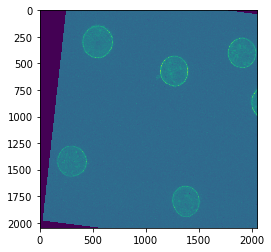

In [138]:
plt.figure
plt.imshow(newX[1,:,:,0])


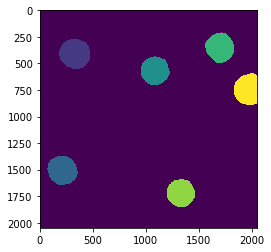

In [139]:
plt.figure
plt.imshow(rankfourY[1,:,:,0])

In [140]:

for i in range(rankfourX.shape[0]):
      resultX = rankfourX[i,:,:,0]
       
     
      base = os.path.split(X[i])[-1]
      
      Filename =  base
      
      save_tiff_imagej_compatible((targetdirX + Filename ) , resultX, axes)
        
for i in range(rankfourY.shape[0]):
      resultY = rankfourY[i,:,:,0]
      base = os.path.split(Y[i])[-1]

      Filename = base
     
      save_tiff_imagej_compatible((targetdirY + Filename ) , resultY, axes)  

for i in range(newX.shape[0]):
      resultX = newX[i,:,:,0]
       
     
      base = os.path.split(X[i])[-1]
      
      Filename = "new" + base
      
      save_tiff_imagej_compatible((targetdirX + Filename ) , resultX, axes)
        
for i in range(newY.shape[0]):
      resultY = newY[i,:,:,0]
      base = os.path.split(Y[i])[-1]

      Filename = "new" + base
     
      save_tiff_imagej_compatible((targetdirY + Filename ) , resultY, axes)        

/Users/aimachine/PyImage/utils/Normalize.py:48: UserWarning: Converting data type from 'float64' to ImageJ-compatible 'float32'.
  warnings.warn("Converting data type from '%s' to ImageJ-compatible '%s'." % (t, np.dtype(t_new)))
/Users/aimachine/PyImage/utils/Normalize.py:160: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  x = x[slices]
/Users/aimachine/PyImage/utils/Normalize.py:48: UserWarning: Converting data type from 'int64' to ImageJ-compatible 'int16'.
  warnings.warn("Converting data type from '%s' to ImageJ-compatible '%s'." % (t, np.dtype(t_new)))


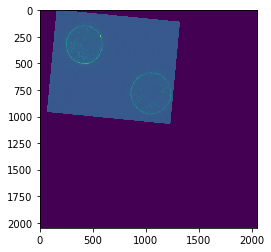

In [141]:
plt.imshow(resultX)

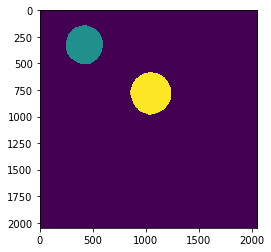

In [142]:
plt.imshow(resultY)